**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)
import numpy as np
np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

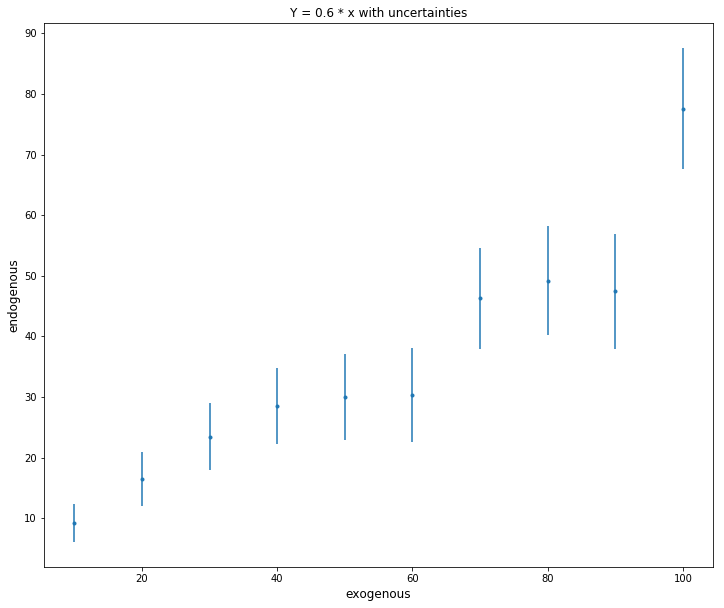

In [3]:
# line(a, x, b=0, errors=None)
# ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
np.random.seed(99)
x = np.linspace(10, 100, 10)
y = line(0.6, x, 0, errors=errors)
plt.figure(figsize=(12, 10))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x],fmt='.')
plt.title("Y = 0.6 * x with uncertainties")
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
y

array([  9.21388959,  16.49946246,  23.46261479,  28.51840135,
        30.00459332,  30.31992195,  46.28735811,  49.18876141,
        47.41943485,  77.59628989])

In [5]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [6]:
x_add_constant = sm.add_constant(x)
x_add_constant

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     348.9
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.66e-08
Time:                        18:41:47   Log-Likelihood:                -32.778
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       9   BIC:                             67.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6439      0.034     18.678      0.000         0.566     0.722
==============================================================================
Omnibus:                        0.461   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.020
Skew:                           0.063   Prob(JB):                        0.990
Kurtosis:                       2.822   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, x_add_constant).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.92e-05
Time:                        18:41:47   Log-Likelihood:                -32.668
No. Observations:                  10   AIC:                             69.34
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0466      4.847      0.422      0.684        -9.131    13.224
x1             0.6146      0.078      7.868      0.000         0.434     0.795
==============================================================================
Omnibus:                        2.235   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                0.422
Skew:                           0.466   Prob(JB):                        0.810
Kurtosis:                       3.380   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Difference**: 
The R-Squared decreased when we changed x into x_add_constant( )=statsmodels.api.add_constant(x), at the meantime we get the coefficient of constant. 

sm.add_constant(x) adds an intercept to the model. R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable x,it decreased here because y is partly explained by intercept. 

# 4. plot the data (as points) and both statsmodels fits

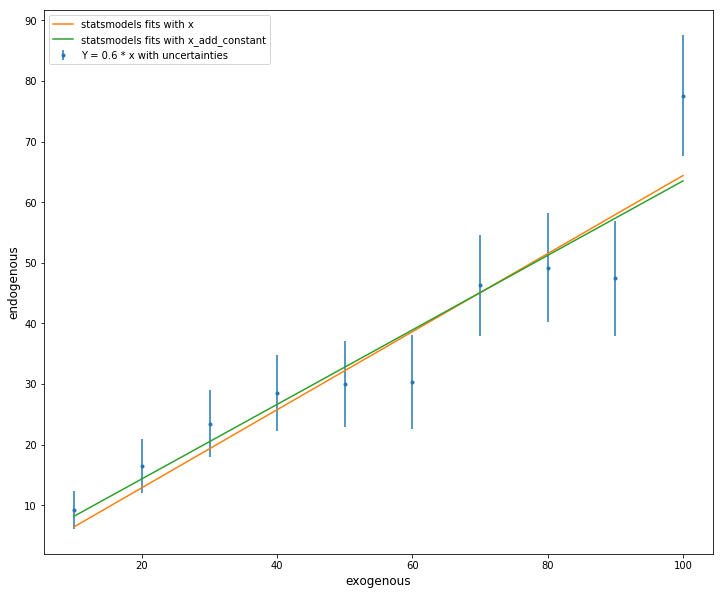

In [9]:
plt.figure(figsize=(12, 10))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], fmt='.', label='Y = 0.6 * x with uncertainties')
plt.plot(x, smfit_wrong.predict(x), label="statsmodels fits with x")
plt.plot(x, smfit_right.predict(x_add_constant), label="statsmodels fits with x_add_constant")

plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.legend(loc="upper left")

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

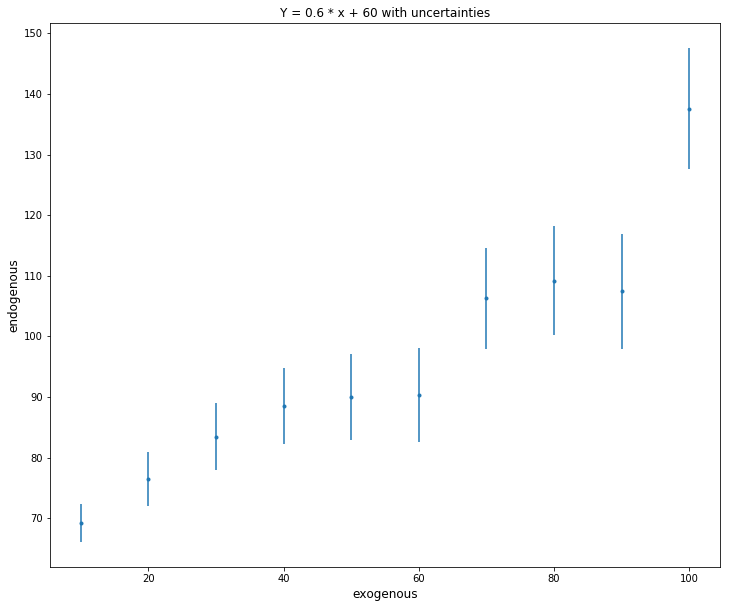

In [10]:
np.random.seed(99)
x = np.linspace(10, 100, 10)
y_intercept = line(0.6, x, 60, errors=errors)
plt.figure(figsize=(12, 10))
plt.errorbar(x, y_intercept, yerr=[errors(xx) for xx in x],fmt='.')
plt.title("Y = 0.6 * x + 60 with uncertainties")
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 6. repeat step 3

In [11]:
#THE WRONG WAY
smfit_wrong_intercept = smf.OLS(y_intercept, x).fit()
smfit_wrong_intercept.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     90.23
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           5.48e-06
Time:                        18:41:47   Log-Likelihood:                -48.004
No. Observations:                  10   AIC:                             98.01
Df Residuals:                       9   BIC:                             98.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5010      0.158      9.499      0.000         1.144     1.858
==============================================================================
Omnibus:                        1.320   Durbin-Watson:                   0.148
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.712
Skew:                           0.113   Prob(JB):                        0.701
Kurtosis:                       1.713   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#THE RIGHT WAY
smfit_right_intercept = smf.OLS(y_intercept, x_add_constant).fit()
smfit_right_intercept.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     61.90
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.92e-05
Time:                        18:41:47   Log-Likelihood:                -32.668
No. Observations:                  10   AIC:                             69.34
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         62.0466      4.847     12.801      0.000        50.869    73.224
x1             0.6146      0.078      7.868      0.000         0.434     0.795
==============================================================================
Omnibus:                        2.235   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                0.422
Skew:                           0.466   Prob(JB):                        0.810
Kurtosis:                       3.380   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Difference**: 
The R-Squared of Wrong way of y_instant~x is larger than wrong way y~x, but the right way's R-Square stays the same. This means add intercept does not increase the R-Square, or how well the model fit with the data.

The same as before: 
The R-Squared decreased when we changed x into x_add_constant( )=statsmodels.api.add_constant(x), at the meantime we get the coefficient of constant. 
sm.add_constant(x) adds an intercept to the model. R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable x,it decreased here because y is partly explained by intercept. 

However, after adding intercept, we can see significant difference between two lines.

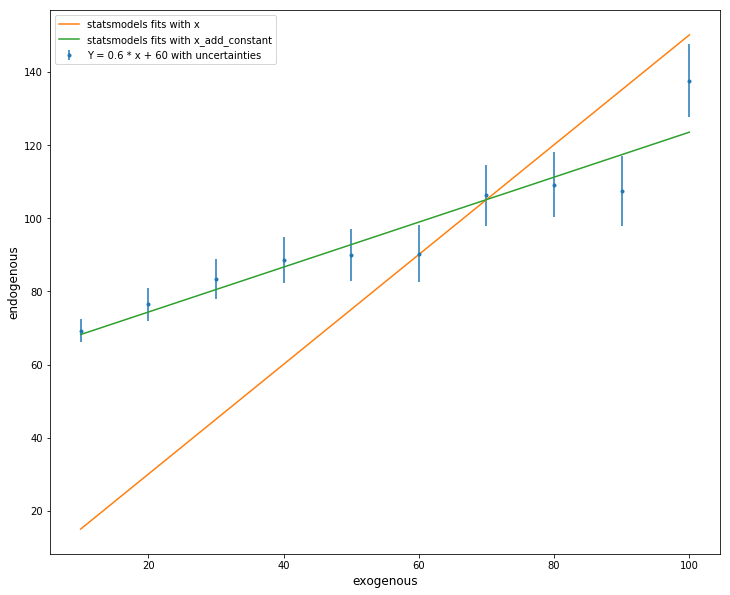

In [13]:
plt.figure(figsize=(12, 10))
plt.errorbar(x, y_intercept, yerr=[errors(xx) for xx in x], fmt='.', label='Y = 0.6 * x + 60 with uncertainties')
plt.plot(x, smfit_wrong_intercept.predict(x), label="statsmodels fits with x")
plt.plot(x, smfit_right_intercept.predict(x_add_constant), label="statsmodels fits with x_add_constant")

plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.legend(loc="upper left")

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. **But a rule of thumb is that the weights would be the _inverse_ **(remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [14]:
smfit_wls = smf.WLS(y, x_add_constant, weights=[100/errors(xx) for xx in x]).fit()
smfit_wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            WLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     84.92
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.56e-05
Time:                        18:41:47   Log-Likelihood:                -31.187
No. Observations:                  10   AIC:                             66.37
Df Residuals:                       8   BIC:                             66.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.1711      3.444      0.921      0.384        -4.772    11.114
x1             0.5955      0.065      9.215      0.000         0.446     0.744
==============================================================================
Omnibus:                        2.465   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                0.534
Skew:                           0.531   Prob(JB):                        0.766
Kurtosis:                       3.394   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R-Square increased a lot.

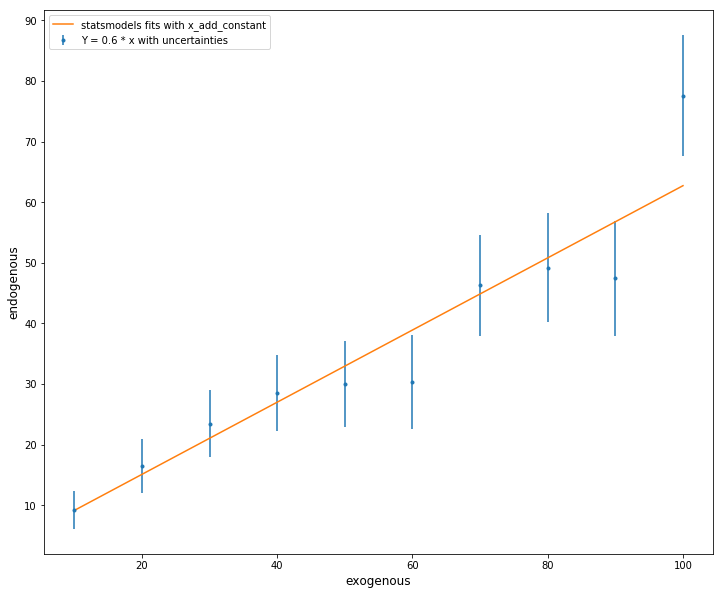

In [16]:
plt.figure(figsize=(12, 10))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], fmt='.', label='Y = 0.6 * x with uncertainties')
# plt.plot(x, smfit_wls.predict(x), label="statsmodels fits with x")
plt.plot(x, smfit_wls.predict(x_add_constant), label="statsmodels fits with x_add_constant")

plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.legend(loc="upper left")

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

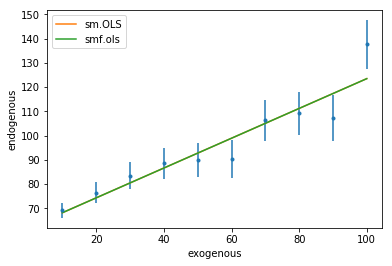

In [22]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y_intercept ~ x_add_constant', data={'x':x_add_constant, 'y':y_intercept}).fit()
pl.errorbar(x, y_intercept, yerr=errors(x), fmt='.')
pl.plot(x, smfit_right_intercept.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();